# Titanic Survival Prediction

## Import the libriaries

In [81]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## read the dataset

In [67]:
data=pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

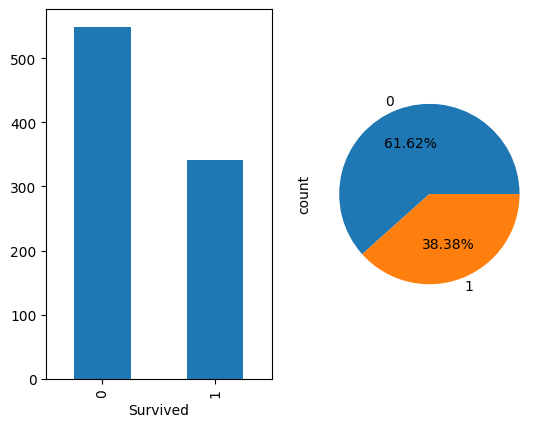

In [70]:
plt.subplot(1,2,1)
data['Survived'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
data['Survived'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

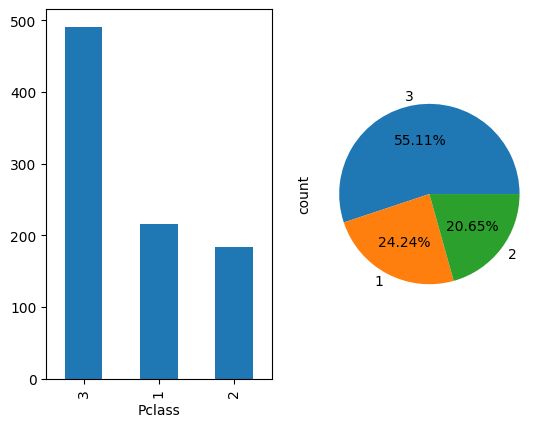

In [71]:
plt.subplot(1,2,1)
data['Pclass'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
data['Pclass'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

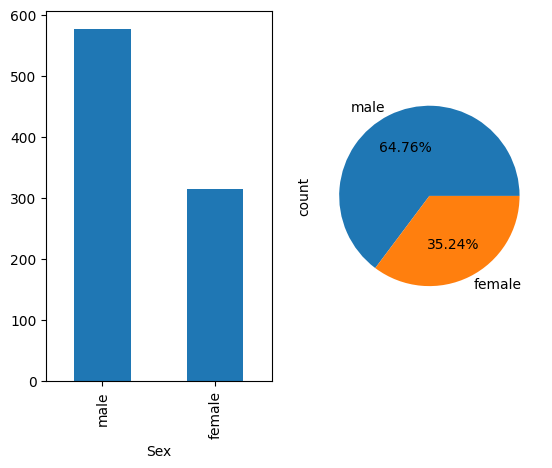

In [72]:
plt.subplot(1,2,1)
data['Sex'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
data['Sex'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

## Extract the selected features

In [83]:
x=data[["Pclass","Sex","Age","Fare"]]

In [84]:
y=data.Survived

In [85]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [86]:
x.Age.fillna(x.Age.mean(),inplace=True)

In [87]:
x.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [88]:
x

,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
...,...,...,...,...
886,2,male,27.000000,13.0000
887,1,female,19.000000,30.0000
888,3,female,29.699118,23.4500
889,1,male,26.000000,30.0000


In [89]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [90]:
le=LabelEncoder()

In [91]:
gen=le.fit_transform(x.Sex)

In [92]:
x["Gender"]=gen

In [93]:
x.drop("Sex",axis=1,inplace=True)

In [94]:
x

,Pclass,Age,Fare,Gender
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


## Split the dataset

In [95]:
X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [96]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 4) (179, 4) (712,) (179,)


## Create and fit the model 

In [97]:
logistic_model = LogisticRegression()

In [98]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [100]:
y_pred=logistic_model.predict(X_test)

## Metrics Evaluation

In [101]:
print(f"classification report ")
print(classification_report(y_test,y_pred))

classification report 
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       100
           1       0.78      0.65      0.71        79

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.77      0.76       179



In [102]:
print("F1-score :",f1_score(y_test,y_pred))
print("Recall-score :",recall_score(y_test,y_pred))
print("Accuracy-score :",accuracy_score(y_test,y_pred))
print("Precision-score :",precision_score(y_test,y_pred))

F1-score : 0.7083333333333334
Recall-score : 0.6455696202531646
Accuracy-score : 0.7653631284916201
Precision-score : 0.7846153846153846


In [103]:
print(f"confusion  matrix ")
print(confusion_matrix(y_test,y_pred))

confusion  matrix 
[[86 14]
 [28 51]]


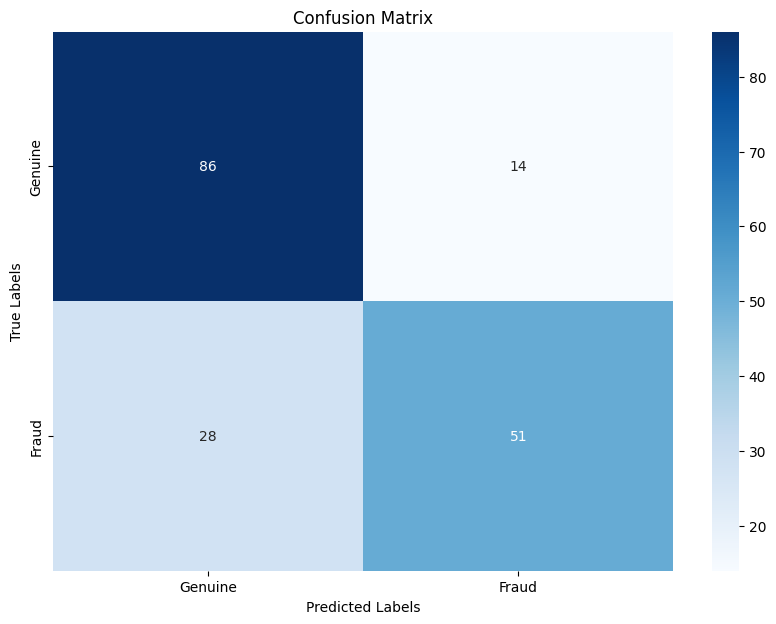

In [104]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fraud'], yticklabels=['Genuine', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()